In [1]:
import numpy as np
from floris.tools import FlorisInterface
import matplotlib.pyplot as plt
import csv


import seaborn as sns
from scipy import stats
import tensorboard as tb
import os

In [3]:


step1 = []
rew1 = []
step2 = []
rew2 = []


with open('logs/Tensor board plots/PPO1_0.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader, None)  # skip the headers

    for row in reader:
        step1.append(float(row[1]))
        rew1.append(float(row[2]))

with open('logs/Tensor board plots/PPO2_0.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader, None)  # skip the headers

    for row in reader:
        step2.append(float(row[1]))
        rew2.append(float(row[2]))





step1 = np.array(step1)
rew1 = np.array(rew1)
step2 = np.array(step2)
rew2 = np.array(rew2)


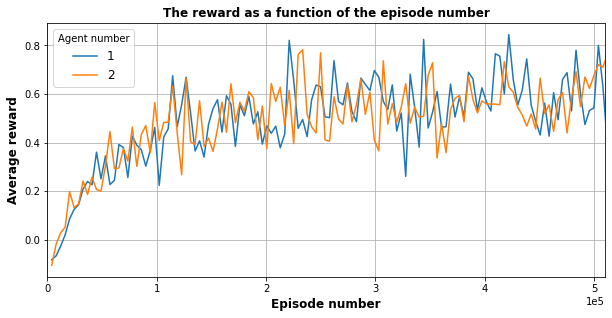

In [18]:
fig = plt.gcf()
fig.set_size_inches(15/1.5, 7/1.5)
ax = plt.gca()
plt.plot(step1,rew1, label = '1')
plt.plot(step2,rew2, label = '2')
#plt.plot(step3,rew3, label = '3')
#plt.plot(step4,rew4, label = '4')
plt.xlabel("Episode number", fontsize = 12, fontweight="bold")
plt.ylabel("Average reward", fontsize = 12, fontweight="bold")
plt.legend(title="Agent number", fontsize = 12)
plt.title("The reward as a function of the episode number", fontsize = 12, fontweight="bold")
plt.grid()
plt.xlim(0,510_000)
#ax.ticklabel_format(style='sci', useMathText=True)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()
fig.savefig('Plots/Fluid meetings/rew_eps1.png', dpi=150)

In [2]:
#This function plots the tensorboard log for the run

experiment = tb.data.experimental.ExperimentFromDev("KUZYeA4JRAiOyXBwDujBcA")

df = experiment.get_scalars()

In [5]:
df.head(5)

,run,tag,step,value
0,A2C4_0,rollout/ep_len_mean,1000,95.444443
1,A2C4_0,rollout/ep_len_mean,2000,98.368423
2,A2C4_0,rollout/ep_len_mean,3000,99.275864
3,A2C4_0,rollout/ep_len_mean,4000,99.717949
4,A2C4_0,rollout/ep_len_mean,5000,99.979591


In [8]:
len(df.run.unique()), df.run.unique()

(9,
 array(['A2C4_0', 'A2C5_0', 'PPO4_0', 'PPO5_0', 'PPO_test_0', 'SAC4_0',
        'SAC5_0', 'TD31_0', 'TD32_0'], dtype=object))

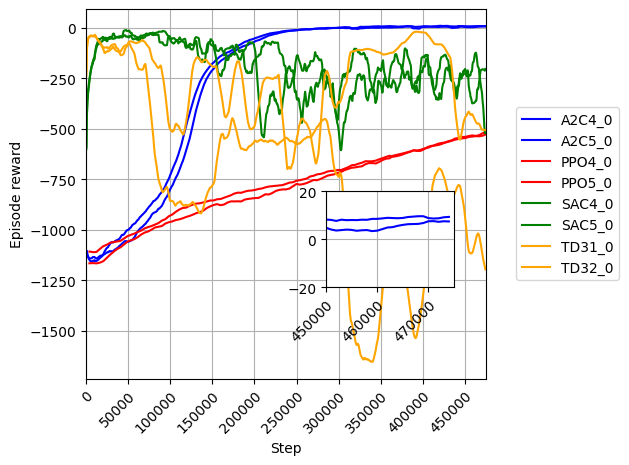

In [63]:
PPO_color = "red"
A2C_color = "blue"
SAC_color = "green"
TD3_color = "orange"

subplot_begin = 450_000
subplot_end = 475_000

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax2 = plt.axes([.5, .3, .2, .2], facecolor='w')

for i in range(len(df.run.unique())):
    name = df.run.unique()[i]

    if "test" not in name:  #onlt plot if the string "test" is not included in the name

        ind_run = df.index[df['run'] == name].tolist()

        sliced_df = df[ind_run[0]:ind_run[-1]]

        ind_rew = sliced_df.index[sliced_df['tag'] == 'rollout/ep_rew_mean'].tolist()

        tb_step = df[ind_rew[0]:ind_rew[-1]]["step"].to_numpy()
        tb_val = df[ind_rew[0]:ind_rew[-1]]["value"].to_numpy()

        if name[0:3] == "PPO":
            c = PPO_color
        if name[0:3] == "A2C":
            c = A2C_color
        if name[0:3] == "SAC":
            c = SAC_color 
        if name[0:3] == "TD3":
            c = TD3_color
        ax1.plot(tb_step, tb_val, label = name, c = c)

        ax2.plot(tb_step, tb_val, label = name, c = c)
ax2.set_xlim([subplot_begin, subplot_end])
ax2.set_xticks(np.arange(subplot_begin, subplot_end, step = 10_000))
plt.setp(ax2.get_xticklabels(), rotation = 45, ha="right", rotation_mode = "anchor")
ax2.set_ylim([-20, 20])
ax2.grid()

ax1.legend()

ax1.set_xlabel("Step")
ax1.set_ylabel("Episode reward")
ax1.grid()
ax1.set_xticks(np.arange(0, 500_000, step=50_000))
ax1.set_xlim([0, subplot_end])
plt.setp(ax1.get_xticklabels(), rotation = 45, ha="right", rotation_mode = "anchor")

ax1.legend(loc=7, bbox_to_anchor = (1.35, 0.5))
fig1.subplots_adjust(right=0.75)

# plt.legend()
# plt.xlabel("Step")
# plt.ylabel("Episode reward")
# plt.grid()
# plt.xticks(np.arange(0, 500_000, step=25_000), rotation = 45)  # Set label locations.
plt.show()


In [ ]:


ind_run = df.index[df['run'] == self.model_name + "_0"].tolist()

sliced_df = df[ind_run[0]:ind_run[-1]]

ind_rew = sliced_df.index[sliced_df['tag'] == 'rollout/ep_rew_mean'].tolist()

tb_step = df[ind_rew[0]:ind_rew[-1]]["step"].to_numpy()
tb_val = df[ind_rew[0]:ind_rew[-1]]["value"].to_numpy()

plt.plot(tb_step, tb_val)
plt.xlabel("Step")
plt.ylabel("Reward")
plt.grid()
plt.xticks(np.arange(0, 500_000, step=25_000), rotation = 45)  # Set label locations.
[plt.axvline(_x, linestyle = "--", linewidth = 0.5, color = "grey") for _x in self.model_steps]
plt.show()

In [23]:
test = df.run.unique()[4]

if "test" in test:
    print("heyo")

heyo
